# Case Study
### Team 17

* 1. Analyze variables, fill in missing values, normalize extreme values.
* 2. Visualize the important variables and test the relationship between the variables.
* 3. Build a Machine Learning classification model to predict whether a vehicle will be sold or not. (Or you can use a regression model to predict the number of days a vehicle will stay on the site until sold)

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
plt.rcParams['figure.figsize']=20,10
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


### Import Data

In [3]:
data=pd.read_csv('Auto.csv')#The sheet is in the same file store.
#data.head()

### Data Cleaning

In [4]:
print('Number of rows:', data.shape[0], ' Number of columns:', data.shape[1])
print(data.info())
print(data.isnull().sum())

Number of rows: 200000  Number of columns: 20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   datecrawled          200000 non-null  object
 1   name                 200000 non-null  object
 2   seller               200000 non-null  object
 3   offertype            200000 non-null  object
 4   price                200000 non-null  int64 
 5   abtest               200000 non-null  object
 6   vehicletype          179622 non-null  object
 7   yearofregistration   200000 non-null  int64 
 8   gearbox              189151 non-null  object
 9   powerps              200000 non-null  int64 
 10  model                188883 non-null  object
 11  kilometer            200000 non-null  int64 
 12  monthofregistration  200000 non-null  int64 
 13  fueltype             181917 non-null  object
 14  brand                200000 non-null  

,Features,MissingPercent
4,notrepaireddamage,19.4255
0,vehicletype,10.1890
3,fueltype,9.0415
2,model,5.5585
1,gearbox,5.4245


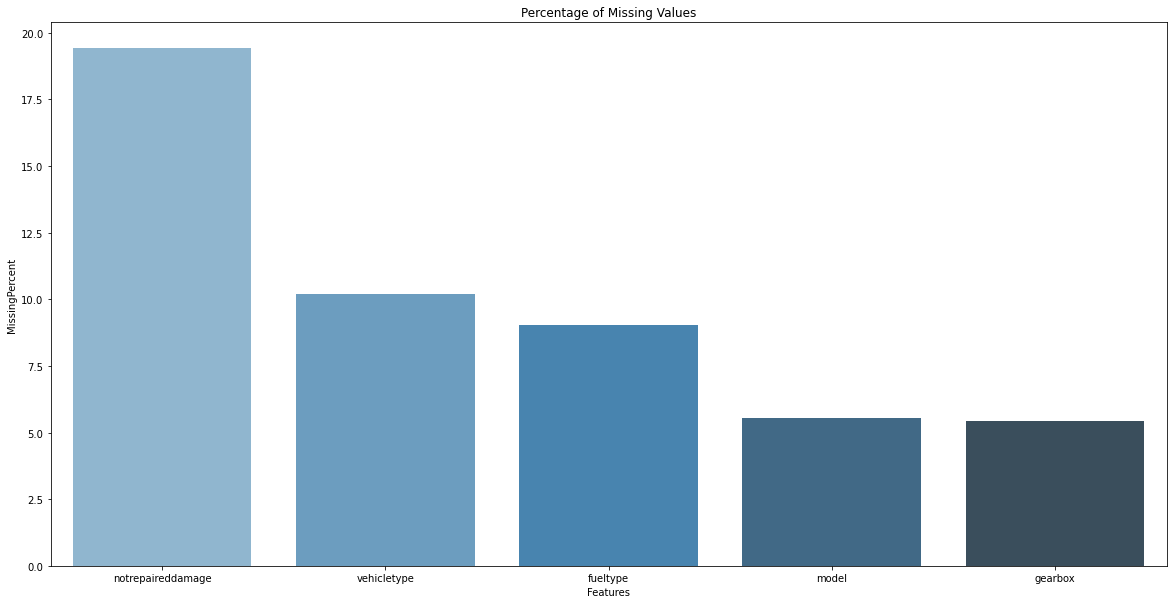

In [5]:
def get_missings(df):
    labels,values = list(),list()
    if df.isna().sum().sum()>0:
        for column in df.columns:
            if df[column].isnull().sum():
                labels.append(column)
                values.append((df[column].isnull().sum() / len(df[column]))*100)

                #Make a dataframe 
        missings=pd.DataFrame({'Features':labels,'MissingPercent':values }).sort_values(by='MissingPercent',ascending=False)
        plt.figure(figsize=(20,10))
        sns.barplot(x=missings.Features,y=missings.MissingPercent, palette="Blues_d").set_title('Percentage of Missing Values')
        return missings
    else:
        return False

get_missings(data)

Text(0, 0.5, 'Fueltype')

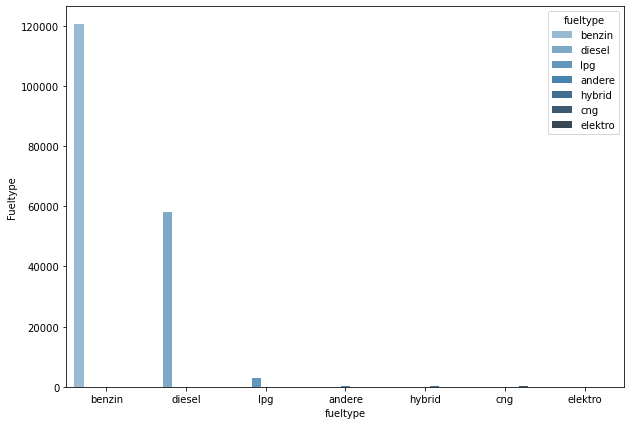

In [6]:
palette="Blues_d"


plt.figure(figsize=(10,7))
sns.countplot(x=data['fueltype'],hue=data.fueltype,palette=palette)
plt.ylabel('Fueltype')

Text(0, 0.5, 'vehicletype')

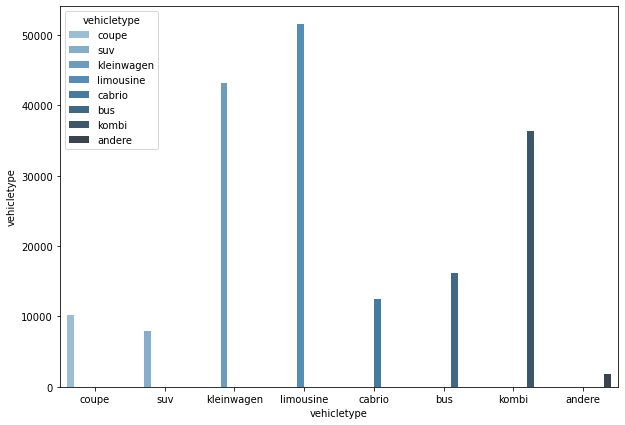

In [7]:
palette="Blues_d"


plt.figure(figsize=(10,7))
sns.countplot(x=data['vehicletype'],hue=data.vehicletype,palette=palette)
plt.ylabel('vehicletype')

The manual option is the most column in the column, so I'm gonna fill it with that value in order to keep the amount of data.
The chart shows us tthat the most common value is "benzin", so if we fill it over the missing values, it won't produce any rare result

In [8]:
data['notrepaireddamage'].fillna('no', inplace=True)
data['gearbox'].fillna('manual',inplace=True)
data['fueltype'].fillna('benzin',inplace=True)

The number of vehicle types is very similar, so the best option is to drop the missing data, in order to avoid any kind of problem on the data set

In [9]:
data_df=data.dropna()

In [10]:
data_df['gearbox']=data_df['gearbox'].replace('automatik','automatic')
data_df['datecrawled']=pd.to_datetime(data_df['datecrawled'])
data_df['lastseen']=pd.to_datetime(data_df['lastseen'])
data_df['datecreated']=pd.to_datetime(data_df['datecreated'])
#data_df['yearofregistration']=pd.to_datetime(data_df['yearofregistration'])
#data_df['monthofregistration']=pd.to_datetime(data_df['monthofregistration'])

<ipython-input-10-09771561a4ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['gearbox']=data_df['gearbox'].replace('automatik','automatic')
<ipython-input-10-09771561a4ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['datecrawled']=pd.to_datetime(data_df['datecrawled'])
<ipython-input-10-09771561a4ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [11]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172287 entries, 2 to 199999
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   datecrawled          172287 non-null  datetime64[ns]
 1   name                 172287 non-null  object        
 2   seller               172287 non-null  object        
 3   offertype            172287 non-null  object        
 4   price                172287 non-null  int64         
 5   abtest               172287 non-null  object        
 6   vehicletype          172287 non-null  object        
 7   yearofregistration   172287 non-null  int64         
 8   gearbox              172287 non-null  object        
 9   powerps              172287 non-null  int64         
 10  model                172287 non-null  object        
 11  kilometer            172287 non-null  int64         
 12  monthofregistration  172287 non-null  int64         
 13  fueltype      

<AxesSubplot:>

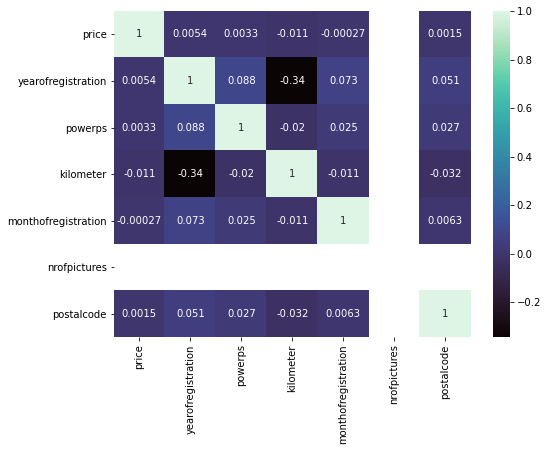

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(data_df.corr(),annot=True, cmap="mako")

In [13]:
data_new=data_df[data_df['price']<1000000]

In [14]:
data_new=data_new[data_new['price']>2000]

In [15]:
data_new=data_df[data_df['price']<500000]

In [16]:
data_new=data_new[data_new['powerps']<1000]

In [17]:
data_new['powerps'].max()

999

In [18]:
data_new=data_new[data_new['kilometer']>20000]
data_new=data_new[data_new['powerps']<240]

array([[<AxesSubplot:title={'center':'datecrawled'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'yearofregistration'}>],
       [<AxesSubplot:title={'center':'powerps'}>,
        <AxesSubplot:title={'center':'kilometer'}>,
        <AxesSubplot:title={'center':'monthofregistration'}>],
       [<AxesSubplot:title={'center':'datecreated'}>,
        <AxesSubplot:title={'center':'postalcode'}>,
        <AxesSubplot:title={'center':'lastseen'}>]], dtype=object)

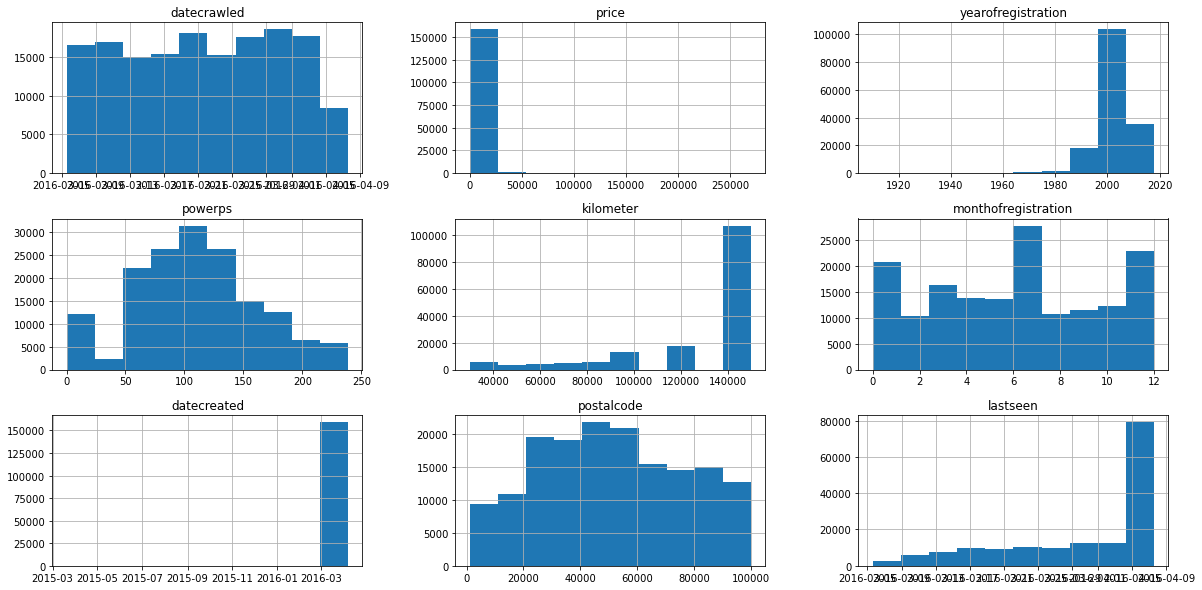

In [19]:
data_new.hist()

In [20]:
data_new.columns

Index(['datecrawled', 'name', 'seller', 'offertype', 'price', 'abtest',
       'vehicletype', 'yearofregistration', 'gearbox', 'powerps', 'model',
       'kilometer', 'monthofregistration', 'fueltype', 'brand',
       'notrepaireddamage', 'datecreated', 'nrofpictures', 'postalcode',
       'lastseen'],
      dtype='object')

In [21]:
df_new=pd.DataFrame(data_new,columns=['price','powerps',
       'kilometer','brand'])

In [22]:
df_new

,price,powerps,kilometer,brand
2,9800,163,125000,jeep
3,1500,75,150000,volkswagen
4,3600,69,90000,skoda
5,650,102,150000,bmw
6,2200,109,150000,peugeot
...,...,...,...,...
199994,1300,75,150000,opel
199995,2599,170,150000,bmw
199997,200,45,150000,volkswagen
199998,15499,231,150000,bmw


In [23]:
#Split-out validation data set
array=df_new.values
X=array[:,0:3]
Y=array[:,3]

In [24]:
X_train,X_validation,Y_train,Y_validation=train_test_split(X,Y,test_size=0.2,random_state=42)

In [25]:
Y_train

array(['opel', 'seat', 'citroen', ..., 'mercedes_benz', 'opel',
       'mitsubishi'], dtype=object)

In [26]:
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
#models.append(('SVM',SVC(gamma='auto')))
results=[]
names=[]
for name, model in models:
    #kfold=StratifiedGroupKFold(n_splits=10,random_state=1,shuffle=True)
    cv_results=cross_val_score(model,X_train,Y_train,cv=5,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name,cv_results.mean(),cv_results.std()))

LR: 0.238716 (0.001857)
LDA: 0.255395 (0.001856)
KNN: 0.269906 (0.002939)
CART: 0.382060 (0.000819)
NB: 0.212514 (0.002360)


{'whiskers': [<matplotlib.lines.Line2D at 0x282dd95a070>,
 'caps': [<matplotlib.lines.Line2D at 0x282dd95a730>,
 'boxes': [<matplotlib.lines.Line2D at 0x282de02fcd0>,
 'medians': [<matplotlib.lines.Line2D at 0x282dd95adf0>,
 'fliers': [<matplotlib.lines.Line2D at 0x282dd968190>,
 'means': []}

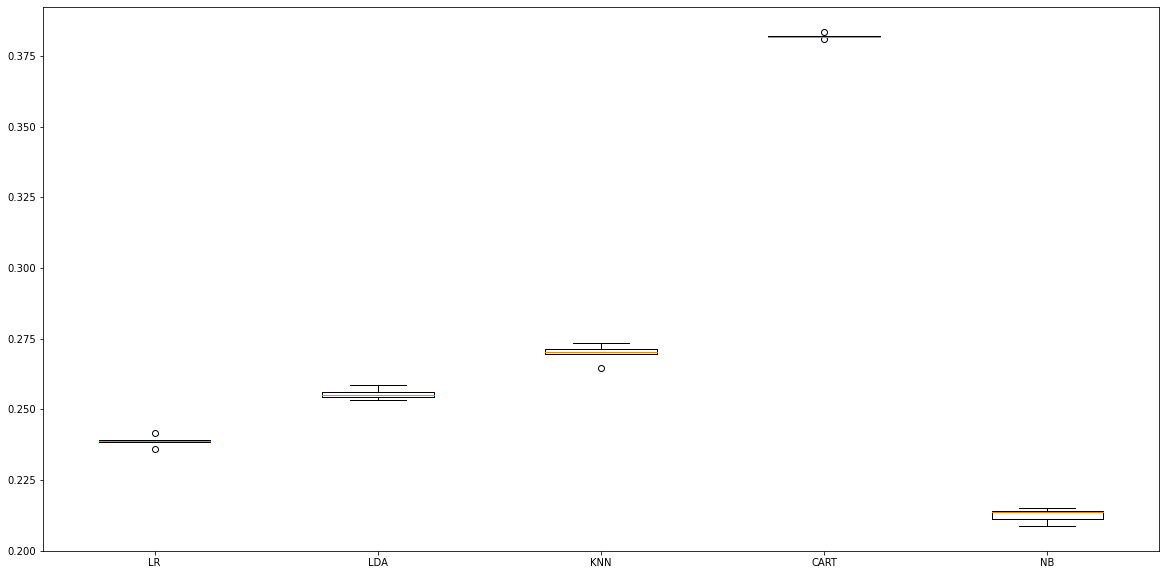

In [27]:
plt.boxplot(results,labels=names)

### Predictions

In [28]:
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)
predictions=model.predict(X_validation)

In [29]:
#Evaluate predictions
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

0.38918123159807055
[[  30   18   33 ...    0   25    6]
 [  16 1120  343 ...    0  688    9]
 [  15  278 2126 ...    0  322   13]
 ...
 [   0    0    1 ...   18    3    0]
 [  14  585  359 ...    0 3968    6]
 [   8   29   48 ...    0   47   48]]
               precision    recall  f1-score   support

   alfa_romeo       0.15      0.16      0.16       188
         audi       0.38      0.39      0.38      2842
          bmw       0.49      0.61      0.54      3482
    chevrolet       0.21      0.18      0.19       150
     chrysler       0.26      0.16      0.20       124
      citroen       0.18      0.14      0.15       479
        dacia       0.18      0.21      0.19        89
       daewoo       0.23      0.24      0.24        41
     daihatsu       0.25      0.21      0.23        66
         fiat       0.26      0.24      0.25       836
         ford       0.30      0.28      0.29      2231
        honda       0.17      0.10      0.12       262
      hyundai       0.28      0.26  

In [30]:
conf_mtrx=confusion_matrix(Y_validation,predictions)
print(conf_mtrx)

[[  30   18   33 ...    0   25    6]
 [  16 1120  343 ...    0  688    9]
 [  15  278 2126 ...    0  322   13]
 ...
 [   0    0    1 ...   18    3    0]
 [  14  585  359 ...    0 3968    6]
 [   8   29   48 ...    0   47   48]]


In [31]:
a=ADASYN()
X_res,y_res=X_train,Y_train
scaler=preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_validation=scaler.transform(X_validation)

In [32]:
model_dtree=tree.DecisionTreeClassifier()


In [33]:
model_dtree.fit(X_res,y_res)

DecisionTreeClassifier()

In [34]:
y_pred=model_dtree.predict(X_validation)

### Random Tree Classifier

In [35]:
a=ADASYN()
X_res,y_res=X_train,Y_train
scaler=preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_validation=scaler.transform(X_validation)

In [36]:
model_crf=RandomForestClassifier()

In [37]:
X_train,X_validation,Y_train,Y_validation=train_test_split(X,Y,test_size=0.2,random_state=42)

In [38]:
model_crf.fit(X_train,Y_train)

RandomForestClassifier()

In [39]:
Y_pred=model_crf.predict(X_validation)

In [40]:
print(classification_report(Y_validation,Y_pred))

               precision    recall  f1-score   support

   alfa_romeo       0.17      0.13      0.14       188
         audi       0.40      0.35      0.37      2842
          bmw       0.49      0.59      0.54      3482
    chevrolet       0.19      0.13      0.15       150
     chrysler       0.23      0.13      0.16       124
      citroen       0.20      0.10      0.13       479
        dacia       0.18      0.15      0.16        89
       daewoo       0.27      0.22      0.24        41
     daihatsu       0.17      0.09      0.12        66
         fiat       0.29      0.22      0.25       836
         ford       0.31      0.26      0.28      2231
        honda       0.19      0.09      0.12       262
      hyundai       0.29      0.22      0.25       313
       jaguar       0.43      0.14      0.21        42
         jeep       0.15      0.11      0.13        64
          kia       0.22      0.15      0.18       233
         lada       0.05      0.05      0.05        20
       la

In [41]:
df_new['brand'].unique()

array(['jeep', 'volkswagen', 'skoda', 'bmw', 'peugeot', 'ford', 'mazda',
       'nissan', 'mercedes_benz', 'opel', 'mini', 'smart', 'renault',
       'audi', 'seat', 'honda', 'fiat', 'alfa_romeo', 'mitsubishi',
       'volvo', 'hyundai', 'suzuki', 'lancia', 'subaru', 'citroen',
       'toyota', 'kia', 'chevrolet', 'dacia', 'daihatsu', 'chrysler',
       'jaguar', 'rover', 'porsche', 'saab', 'daewoo', 'land_rover',
       'trabant', 'lada'], dtype=object)

### Clusters

(array([54864., 21046., 36724., 26246.,  6479.,  4439.,  6010.,  2155.,
          892.,   771.]),
 array([ 0. ,  3.8,  7.6, 11.4, 15.2, 19. , 22.8, 26.6, 30.4, 34.2, 38. ]),
 <BarContainer object of 10 artists>)

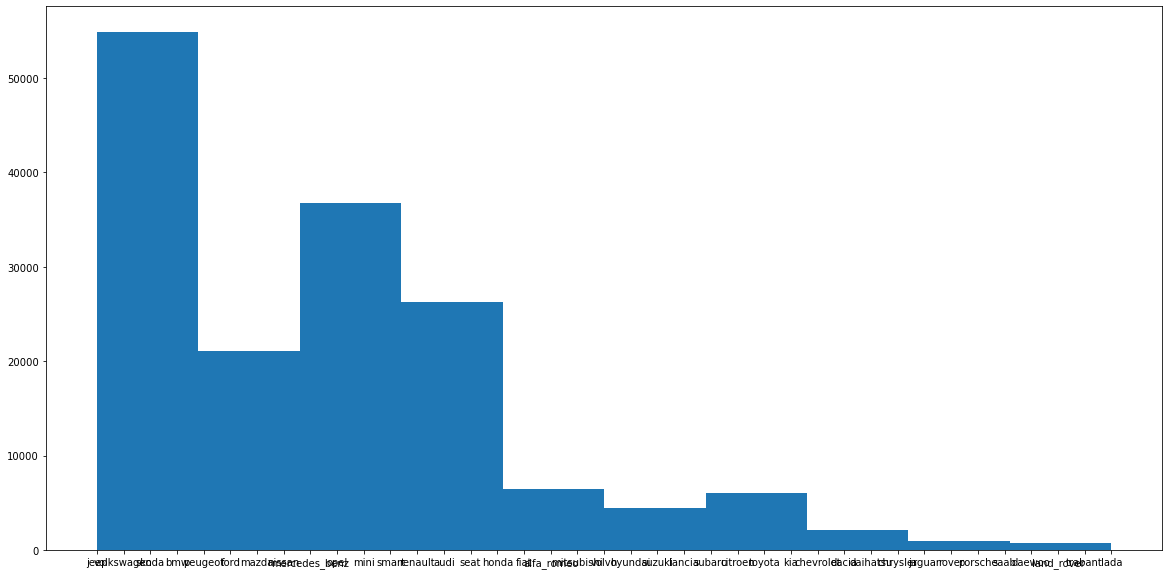

In [42]:
plt.hist(df_new.brand)

In [43]:
df_new.groupby('brand').mean()

,price,powerps,kilometer
brand,,,
alfa_romeo,3979.761150,134.817641,133136.769078
audi,7678.098400,143.700229,134587.617823
bmw,7097.120829,152.378268,137219.472428
chevrolet,5773.446753,109.906494,104506.493506
chrysler,3559.547967,139.178862,137024.390244
citroen,3652.543251,87.638111,123758.880067
dacia,5528.483092,82.664251,94504.830918
daewoo,1092.298701,73.103896,127012.987013
daihatsu,1786.134831,59.424157,121741.573034


In [44]:
features=df_new[['price','powerps','kilometer']]
features

,price,powerps,kilometer
2,9800,163,125000
3,1500,75,150000
4,3600,69,90000
5,650,102,150000
6,2200,109,150000
...,...,...,...
199994,1300,75,150000
199995,2599,170,150000
199997,200,45,150000
199998,15499,231,150000


### Data Normalization

In [45]:
df_norm=(features-features.min())/(features.max()-features.min())
df_norm.head()
#Se normalizan los datos para poder realizar el clustering y no haya un número dominante

,price,powerps,kilometer
2,0.036296,0.682008,0.791667
3,0.005556,0.313808,1.000000
4,0.013333,0.288703,0.500000
5,0.002407,0.426778,1.000000
6,0.008148,0.456067,1.000000


### Clustering jerárquico con scikit-learn

In [46]:
from sklearn.cluster import AgglomerativeClustering

In [47]:
df_norm=df_norm.reset_index()

In [48]:
df=df_norm[:1000]
df

,index,price,powerps,kilometer
0,2,0.036296,0.682008,0.791667
1,3,0.005556,0.313808,1.000000
2,4,0.013333,0.288703,0.500000
3,5,0.002407,0.426778,1.000000
4,6,0.008148,0.456067,1.000000
...,...,...,...,...
995,1269,0.001667,0.000000,1.000000
996,1270,0.023333,0.748954,1.000000
997,1271,0.037037,0.740586,1.000000
998,1272,0.003519,0.376569,1.000000


In [49]:
df.columns
df=pd.DataFrame(df,columns=['price', 'powerps', 'kilometer'])

In [50]:
clus=AgglomerativeClustering(n_clusters=6, linkage='ward').fit(df)

In [51]:
md_h=pd.Series(clus.labels_)
md_h

0      1
1      0
2      2
3      1
4      1
      ..
995    0
996    4
997    4
998    1
999    3
Length: 1000, dtype: int64

(array([243.,   0., 411.,   0.,  81.,   0.,  75.,   0., 120.,  70.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

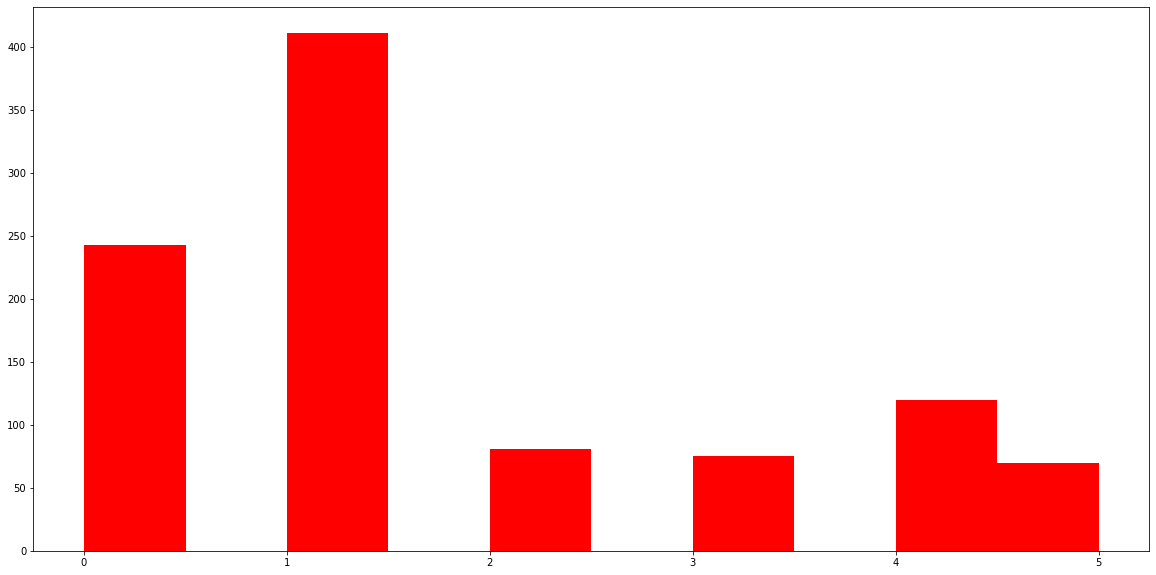

In [52]:
plt.hist(md_h,color='r')

In [53]:
clus.children_

array([[ 771,  906],
       [   3,  179],
       [  30,  818],
       ...,
       [1991, 1994],
       [1993, 1995],
       [1996, 1997]], dtype=int64)

In [54]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z=linkage(df,'ward')

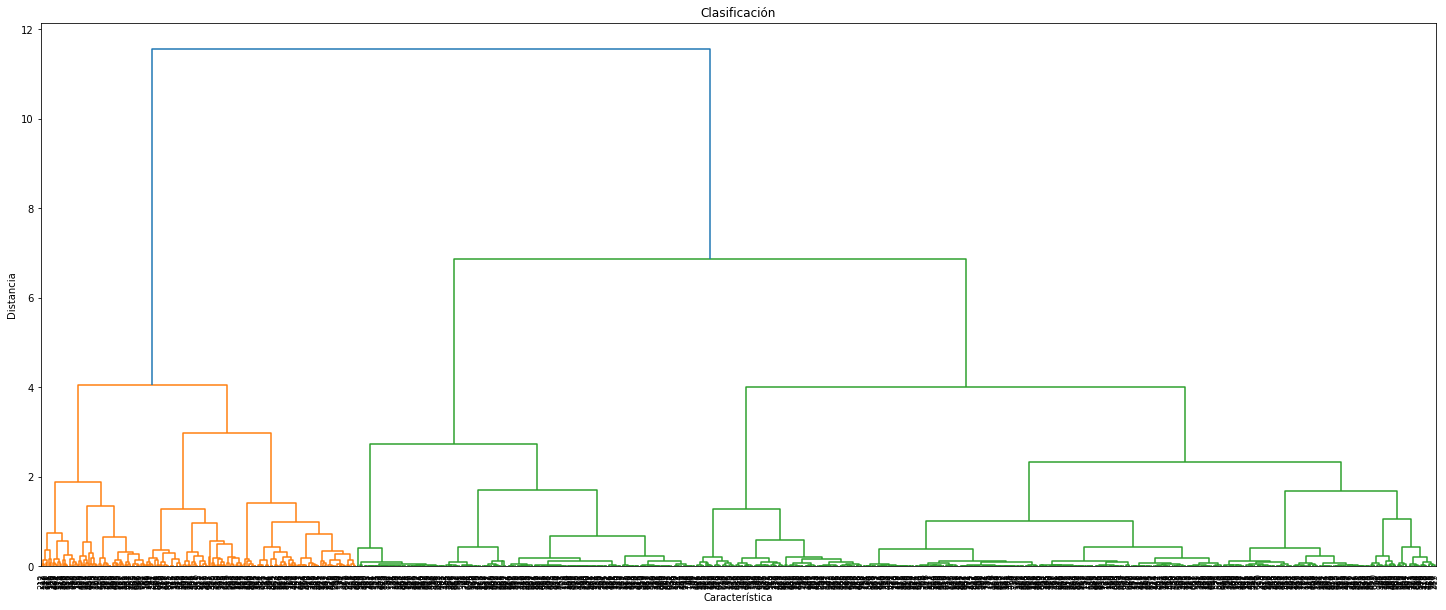

In [55]:
plt.figure(figsize=(25,10))
plt.title('Clasificación')
plt.xlabel('Característica')
plt.ylabel('Distancia')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=8.)
plt.show()

### KMeans

In [56]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [57]:
model=KMeans(n_clusters=6)
model.fit(df)

KMeans(n_clusters=6)

In [58]:
model.labels_

array([3, 0, 5, 0, 0, 1, 1, 0, 0, 3, 0, 0, 4, 2, 0, 5, 0, 0, 3, 5, 5, 0,
       3, 3, 0, 3, 3, 2, 2, 5, 0, 0, 3, 0, 0, 0, 4, 3, 2, 0, 3, 1, 2, 0,
       0, 2, 0, 3, 2, 0, 5, 0, 3, 0, 0, 0, 0, 3, 0, 2, 0, 4, 3, 0, 0, 3,
       3, 0, 3, 3, 3, 2, 0, 0, 2, 0, 0, 5, 0, 3, 4, 0, 3, 4, 2, 3, 2, 1,
       0, 3, 5, 5, 4, 0, 0, 0, 0, 0, 2, 2, 3, 4, 2, 3, 0, 3, 3, 2, 1, 0,
       2, 0, 2, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 5, 0, 3, 0, 2, 1, 0, 0, 4,
       0, 2, 3, 0, 0, 0, 5, 3, 4, 0, 5, 5, 5, 4, 3, 0, 0, 2, 2, 2, 3, 0,
       1, 0, 0, 4, 3, 5, 3, 0, 3, 0, 1, 0, 0, 2, 3, 1, 0, 1, 0, 0, 2, 0,
       0, 3, 0, 0, 0, 3, 0, 4, 3, 2, 3, 3, 3, 0, 0, 3, 1, 0, 2, 2, 3, 2,
       1, 0, 0, 0, 0, 0, 0, 5, 3, 0, 4, 0, 3, 0, 4, 5, 0, 3, 4, 4, 3, 0,
       3, 0, 1, 2, 4, 1, 3, 0, 1, 2, 3, 0, 2, 0, 0, 0, 5, 4, 0, 0, 0, 0,
       3, 3, 0, 3, 2, 3, 3, 1, 3, 0, 2, 1, 5, 2, 0, 3, 3, 0, 0, 2, 3, 0,
       5, 0, 3, 0, 3, 2, 0, 4, 1, 0, 2, 0, 3, 5, 0, 0, 2, 1, 3, 0, 0, 0,
       3, 0, 0, 5, 0, 3, 5, 2, 0, 3, 2, 5, 0, 3, 3,

In [59]:
md_k=pd.Series(model.labels_)
md_k

0      3
1      0
2      5
3      0
4      0
      ..
995    2
996    3
997    3
998    0
999    4
Length: 1000, dtype: int32

In [60]:
df['cluster_jerarquico']=md_h
df['cluster_Kmeans']=md_k

In [61]:
df.head()

,price,powerps,kilometer,cluster_jerarquico,cluster_Kmeans
0,0.036296,0.682008,0.791667,1,3
1,0.005556,0.313808,1.000000,0,0
2,0.013333,0.288703,0.500000,2,5
3,0.002407,0.426778,1.000000,1,0
4,0.008148,0.456067,1.000000,1,0


(array([393.,   0.,  66.,   0., 141.,   0., 241.,   0.,  64.,  95.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

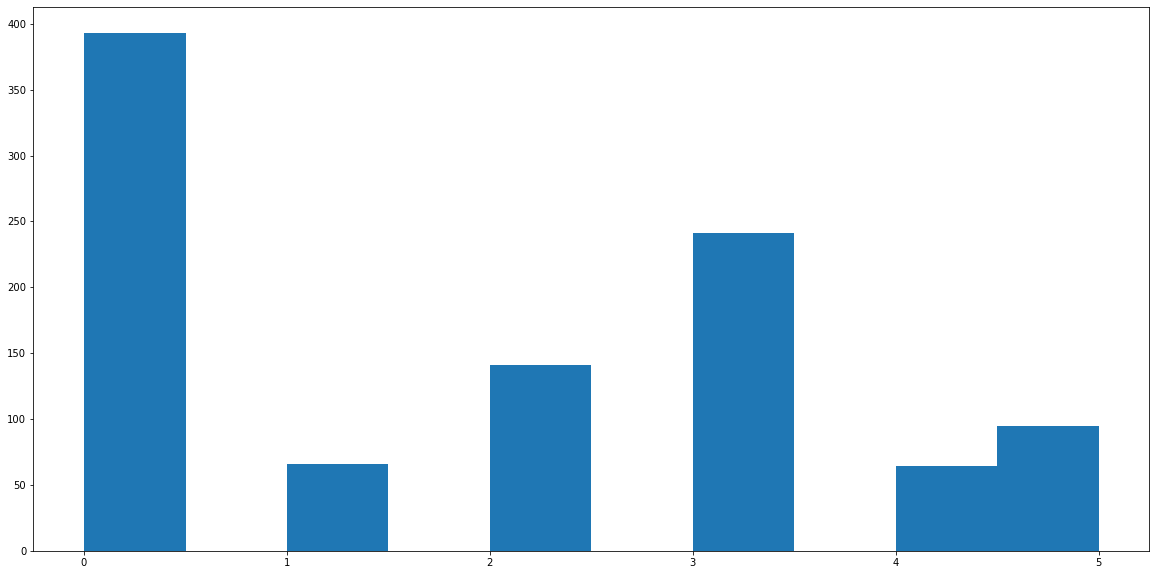

In [62]:
plt.hist(md_k)

In [63]:
model.cluster_centers_

array([[0.00982582, 0.42471281, 0.97508482],
       [0.04200892, 0.41245087, 0.10606061],
       [0.00645374, 0.12478115, 0.97044917],
       [0.02603184, 0.72461327, 0.97665975],
       [0.05439641, 0.73895136, 0.44401042],
       [0.01770706, 0.30658445, 0.46754386]])

### Final Interpretation

In [64]:
d=df_new['brand']
d=d.reset_index()
d=pd.DataFrame(d,columns=['brand'])
d

,brand
0,jeep
1,volkswagen
2,skoda
3,bmw
4,peugeot
...,...
159621,opel
159622,bmw
159623,volkswagen
159624,bmw


In [65]:
d=d[:1000]
d.shape

(1000, 1)

In [66]:
df=df.join(d)
df

,price,powerps,kilometer,cluster_jerarquico,cluster_Kmeans,brand
0,0.036296,0.682008,0.791667,1,3,jeep
1,0.005556,0.313808,1.000000,0,0,volkswagen
2,0.013333,0.288703,0.500000,2,5,skoda
3,0.002407,0.426778,1.000000,1,0,bmw
4,0.008148,0.456067,1.000000,1,0,peugeot
...,...,...,...,...,...,...
995,0.001667,0.000000,1.000000,0,2,renault
996,0.023333,0.748954,1.000000,4,3,audi
997,0.037037,0.740586,1.000000,4,3,audi
998,0.003519,0.376569,1.000000,1,0,volkswagen


In [67]:
df.groupby('cluster_Kmeans').mean()

,price,powerps,kilometer,cluster_jerarquico
cluster_Kmeans,,,,
0,0.009826,0.424713,0.975085,0.740458
1,0.042009,0.412451,0.106061,4.636364
2,0.006454,0.124781,0.970449,0.000000
3,0.026032,0.724613,0.976660,2.502075
4,0.054396,0.738951,0.444010,2.968750
5,0.017707,0.306584,0.467544,2.505263


* 3. Build a Machine Learning classification model to predict whether a vehicle will be sold or not. (Or you can use a regression model to predict the number of days a vehicle will stay on the site until sold)

In [68]:
data_new.shape

(159626, 20)

In [69]:
dataset=data_new

In [70]:
dataset=dataset.reset_index()

In [71]:
dataset.columns

Index(['index', 'datecrawled', 'name', 'seller', 'offertype', 'price',
       'abtest', 'vehicletype', 'yearofregistration', 'gearbox', 'powerps',
       'model', 'kilometer', 'monthofregistration', 'fueltype', 'brand',
       'notrepaireddamage', 'datecreated', 'nrofpictures', 'postalcode',
       'lastseen'],
      dtype='object')

In [72]:
dataset=pd.DataFrame(dataset,columns=['datecrawled', 'name', 'seller', 'offertype', 'price',
       'abtest', 'vehicletype', 'yearofregistration', 'gearbox', 'powerps',
       'model', 'kilometer', 'monthofregistration', 'fueltype', 'brand',
       'notrepaireddamage', 'datecreated', 'nrofpictures', 'postalcode',
       'lastseen'])

In [73]:
dataset.head()

,datecrawled,name,seller,offertype,price,abtest,vehicletype,yearofregistration,gearbox,powerps,model,kilometer,monthofregistration,fueltype,brand,notrepaireddamage,datecreated,nrofpictures,postalcode,lastseen
0,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatic,163,grand,125000,8,diesel,jeep,no,2016-03-14,False,90480,2016-04-05 12:47:46
1,2016-03-17 16:54:04,GOLF_4_1_4__3T?ER,privat,Angebot,1500,test,kleinwagen,2001,manual,75,golf,150000,6,benzin,volkswagen,no,2016-03-17,False,91074,2016-03-17 17:40:17
2,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manual,69,fabia,90000,7,diesel,skoda,no,2016-03-31,False,60437,2016-04-06 10:17:21
3,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manual,102,3er,150000,10,benzin,bmw,yes,2016-04-04,False,33775,2016-04-06 19:17:07
4,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manual,109,2_reihe,150000,8,benzin,peugeot,no,2016-04-01,False,67112,2016-04-05 18:18:39


In [74]:
dataset['monthofregistration'].unique()

array([ 8,  6,  7, 10,  0, 12, 11,  2,  3,  4,  1,  5,  9], dtype=int64)

In [75]:
dataset['monthofregistration']=dataset['monthofregistration'].replace(0,1)

In [76]:
dataset['monthofregistration'].unique()

array([ 8,  6,  7, 10,  1, 12, 11,  2,  3,  4,  5,  9], dtype=int64)

<AxesSubplot:>

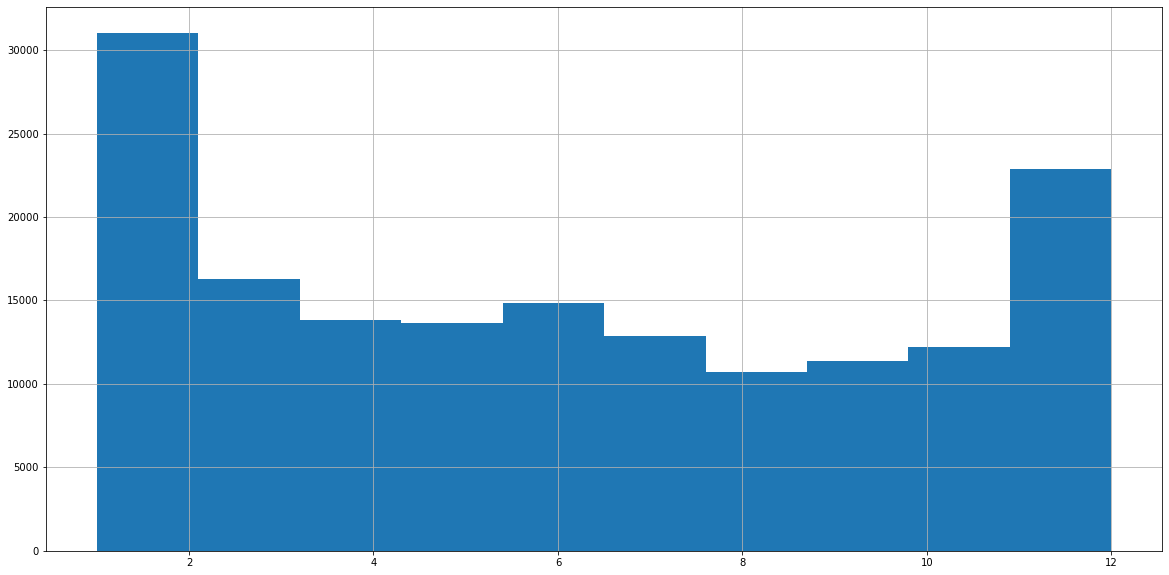

In [77]:
dataset['monthofregistration'].hist()

<AxesSubplot:>

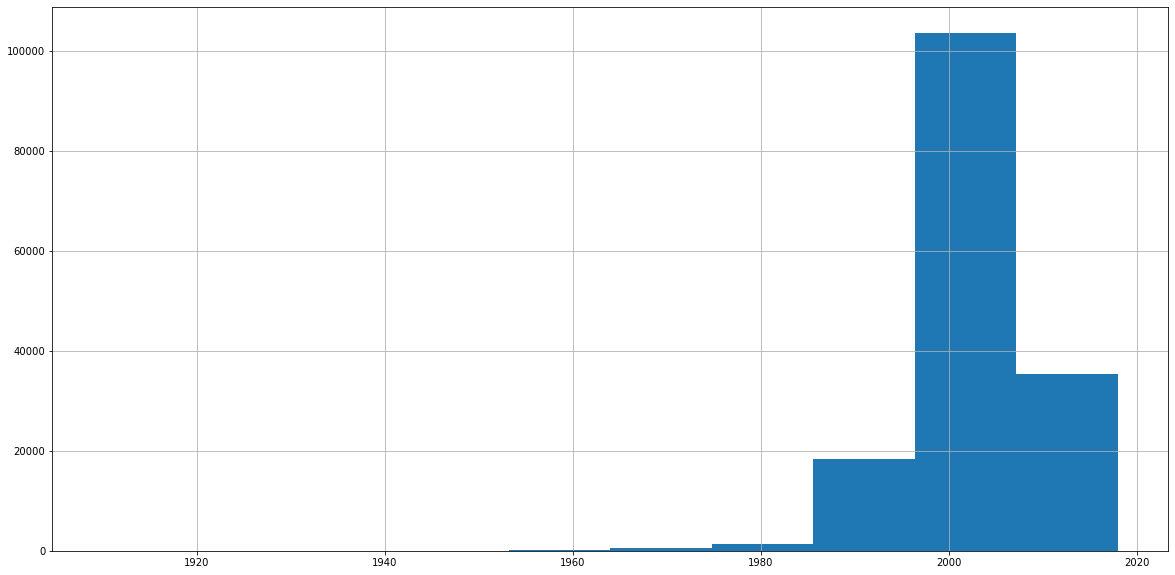

In [78]:
dataset['yearofregistration'].hist()

In [79]:
dataset['yearMonth']=dataset['yearofregistration'].map(str)+"-"+dataset['monthofregistration'].map(str)

In [80]:
dataset['yearMonth']=pd.to_datetime(dataset['yearMonth'])

In [81]:
dataset

,datecrawled,name,seller,offertype,price,abtest,vehicletype,yearofregistration,gearbox,powerps,...,kilometer,monthofregistration,fueltype,brand,notrepaireddamage,datecreated,nrofpictures,postalcode,lastseen,yearMonth
0,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatic,163,...,125000,8,diesel,jeep,no,2016-03-14,False,90480,2016-04-05 12:47:46,2004-08-01
1,2016-03-17 16:54:04,GOLF_4_1_4__3T?ER,privat,Angebot,1500,test,kleinwagen,2001,manual,75,...,150000,6,benzin,volkswagen,no,2016-03-17,False,91074,2016-03-17 17:40:17,2001-06-01
2,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manual,69,...,90000,7,diesel,skoda,no,2016-03-31,False,60437,2016-04-06 10:17:21,2008-07-01
3,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manual,102,...,150000,10,benzin,bmw,yes,2016-04-04,False,33775,2016-04-06 19:17:07,1995-10-01
4,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manual,109,...,150000,8,benzin,peugeot,no,2016-04-01,False,67112,2016-04-05 18:18:39,2004-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159621,2016-04-01 20:39:59,Opel_astra_coup,privat,Angebot,1300,test,coupe,1998,manual,75,...,150000,1,benzin,opel,no,2016-04-01,False,25361,2016-04-05 17:26:59,1998-01-01
159622,2016-04-04 21:57:09,BMW_Sport_Edition_M_Paket_ab_Werk_Leder_Klima_...,privat,Angebot,2599,test,kombi,1998,manual,170,...,150000,6,benzin,bmw,no,2016-04-04,False,42897,2016-04-07 00:45:21,1998-06-01
159623,2016-03-08 10:48:20,VW_Polo_C86_Coup,privat,Angebot,200,test,coupe,1991,manual,45,...,150000,6,benzin,volkswagen,no,2016-03-08,False,47877,2016-03-20 19:48:08,1991-06-01
159624,2016-03-18 01:57:27,Bmw_330_Diesel_Coup,privat,Angebot,15499,control,coupe,2007,automatic,231,...,150000,5,diesel,bmw,no,2016-03-18,False,73770,2016-03-29 12:17:52,2007-05-01


In [82]:
dataset['daysofregistration']=dataset['lastseen']-dataset['yearMonth']

In [83]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159626 entries, 0 to 159625
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype          
---  ------               --------------   -----          
 0   datecrawled          159626 non-null  datetime64[ns] 
 1   name                 159626 non-null  object         
 2   seller               159626 non-null  object         
 3   offertype            159626 non-null  object         
 4   price                159626 non-null  int64          
 5   abtest               159626 non-null  object         
 6   vehicletype          159626 non-null  object         
 7   yearofregistration   159626 non-null  int64          
 8   gearbox              159626 non-null  object         
 9   powerps              159626 non-null  int64          
 10  model                159626 non-null  object         
 11  kilometer            159626 non-null  int64          
 12  monthofregistration  159626 non-null  int64          
 13 

In [84]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159626 entries, 0 to 159625
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype          
---  ------               --------------   -----          
 0   datecrawled          159626 non-null  datetime64[ns] 
 1   name                 159626 non-null  object         
 2   seller               159626 non-null  object         
 3   offertype            159626 non-null  object         
 4   price                159626 non-null  int64          
 5   abtest               159626 non-null  object         
 6   vehicletype          159626 non-null  object         
 7   yearofregistration   159626 non-null  int64          
 8   gearbox              159626 non-null  object         
 9   powerps              159626 non-null  int64          
 10  model                159626 non-null  object         
 11  kilometer            159626 non-null  int64          
 12  monthofregistration  159626 non-null  int64          
 13 

In [85]:
dataset['daysofregistration']=dataset['daysofregistration'].astype(str)

In [86]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159626 entries, 0 to 159625
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   datecrawled          159626 non-null  datetime64[ns]
 1   name                 159626 non-null  object        
 2   seller               159626 non-null  object        
 3   offertype            159626 non-null  object        
 4   price                159626 non-null  int64         
 5   abtest               159626 non-null  object        
 6   vehicletype          159626 non-null  object        
 7   yearofregistration   159626 non-null  int64         
 8   gearbox              159626 non-null  object        
 9   powerps              159626 non-null  int64         
 10  model                159626 non-null  object        
 11  kilometer            159626 non-null  int64         
 12  monthofregistration  159626 non-null  int64         
 13  fueltype      

In [87]:
#dataset['daysofregistration']=dataset['daysofregistration'].str.extract()
lst=list()
for x in dataset['daysofregistration']:
    m=x.split()
    m=m[0]
    lst.append(m)

In [88]:
dataset['daysofregistration']=lst

In [89]:
dataset

,datecrawled,name,seller,offertype,price,abtest,vehicletype,yearofregistration,gearbox,powerps,...,monthofregistration,fueltype,brand,notrepaireddamage,datecreated,nrofpictures,postalcode,lastseen,yearMonth,daysofregistration
0,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatic,163,...,8,diesel,jeep,no,2016-03-14,False,90480,2016-04-05 12:47:46,2004-08-01,4265
1,2016-03-17 16:54:04,GOLF_4_1_4__3T?ER,privat,Angebot,1500,test,kleinwagen,2001,manual,75,...,6,benzin,volkswagen,no,2016-03-17,False,91074,2016-03-17 17:40:17,2001-06-01,5403
2,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manual,69,...,7,diesel,skoda,no,2016-03-31,False,60437,2016-04-06 10:17:21,2008-07-01,2836
3,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manual,102,...,10,benzin,bmw,yes,2016-04-04,False,33775,2016-04-06 19:17:07,1995-10-01,7493
4,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manual,109,...,8,benzin,peugeot,no,2016-04-01,False,67112,2016-04-05 18:18:39,2004-08-01,4265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159621,2016-04-01 20:39:59,Opel_astra_coup,privat,Angebot,1300,test,coupe,1998,manual,75,...,1,benzin,opel,no,2016-04-01,False,25361,2016-04-05 17:26:59,1998-01-01,6669
159622,2016-04-04 21:57:09,BMW_Sport_Edition_M_Paket_ab_Werk_Leder_Klima_...,privat,Angebot,2599,test,kombi,1998,manual,170,...,6,benzin,bmw,no,2016-04-04,False,42897,2016-04-07 00:45:21,1998-06-01,6520
159623,2016-03-08 10:48:20,VW_Polo_C86_Coup,privat,Angebot,200,test,coupe,1991,manual,45,...,6,benzin,volkswagen,no,2016-03-08,False,47877,2016-03-20 19:48:08,1991-06-01,9059
159624,2016-03-18 01:57:27,Bmw_330_Diesel_Coup,privat,Angebot,15499,control,coupe,2007,automatic,231,...,5,diesel,bmw,no,2016-03-18,False,73770,2016-03-29 12:17:52,2007-05-01,3255


In [90]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159626 entries, 0 to 159625
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   datecrawled          159626 non-null  datetime64[ns]
 1   name                 159626 non-null  object        
 2   seller               159626 non-null  object        
 3   offertype            159626 non-null  object        
 4   price                159626 non-null  int64         
 5   abtest               159626 non-null  object        
 6   vehicletype          159626 non-null  object        
 7   yearofregistration   159626 non-null  int64         
 8   gearbox              159626 non-null  object        
 9   powerps              159626 non-null  int64         
 10  model                159626 non-null  object        
 11  kilometer            159626 non-null  int64         
 12  monthofregistration  159626 non-null  int64         
 13  fueltype      

In [91]:
dataset

,datecrawled,name,seller,offertype,price,abtest,vehicletype,yearofregistration,gearbox,powerps,...,monthofregistration,fueltype,brand,notrepaireddamage,datecreated,nrofpictures,postalcode,lastseen,yearMonth,daysofregistration
0,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatic,163,...,8,diesel,jeep,no,2016-03-14,False,90480,2016-04-05 12:47:46,2004-08-01,4265
1,2016-03-17 16:54:04,GOLF_4_1_4__3T?ER,privat,Angebot,1500,test,kleinwagen,2001,manual,75,...,6,benzin,volkswagen,no,2016-03-17,False,91074,2016-03-17 17:40:17,2001-06-01,5403
2,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manual,69,...,7,diesel,skoda,no,2016-03-31,False,60437,2016-04-06 10:17:21,2008-07-01,2836
3,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manual,102,...,10,benzin,bmw,yes,2016-04-04,False,33775,2016-04-06 19:17:07,1995-10-01,7493
4,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manual,109,...,8,benzin,peugeot,no,2016-04-01,False,67112,2016-04-05 18:18:39,2004-08-01,4265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159621,2016-04-01 20:39:59,Opel_astra_coup,privat,Angebot,1300,test,coupe,1998,manual,75,...,1,benzin,opel,no,2016-04-01,False,25361,2016-04-05 17:26:59,1998-01-01,6669
159622,2016-04-04 21:57:09,BMW_Sport_Edition_M_Paket_ab_Werk_Leder_Klima_...,privat,Angebot,2599,test,kombi,1998,manual,170,...,6,benzin,bmw,no,2016-04-04,False,42897,2016-04-07 00:45:21,1998-06-01,6520
159623,2016-03-08 10:48:20,VW_Polo_C86_Coup,privat,Angebot,200,test,coupe,1991,manual,45,...,6,benzin,volkswagen,no,2016-03-08,False,47877,2016-03-20 19:48:08,1991-06-01,9059
159624,2016-03-18 01:57:27,Bmw_330_Diesel_Coup,privat,Angebot,15499,control,coupe,2007,automatic,231,...,5,diesel,bmw,no,2016-03-18,False,73770,2016-03-29 12:17:52,2007-05-01,3255


array([[<AxesSubplot:title={'center':'datecrawled'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'yearofregistration'}>],
       [<AxesSubplot:title={'center':'powerps'}>,
        <AxesSubplot:title={'center':'kilometer'}>,
        <AxesSubplot:title={'center':'monthofregistration'}>],
       [<AxesSubplot:title={'center':'datecreated'}>,
        <AxesSubplot:title={'center':'postalcode'}>,
        <AxesSubplot:title={'center':'lastseen'}>],
       [<AxesSubplot:title={'center':'yearMonth'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

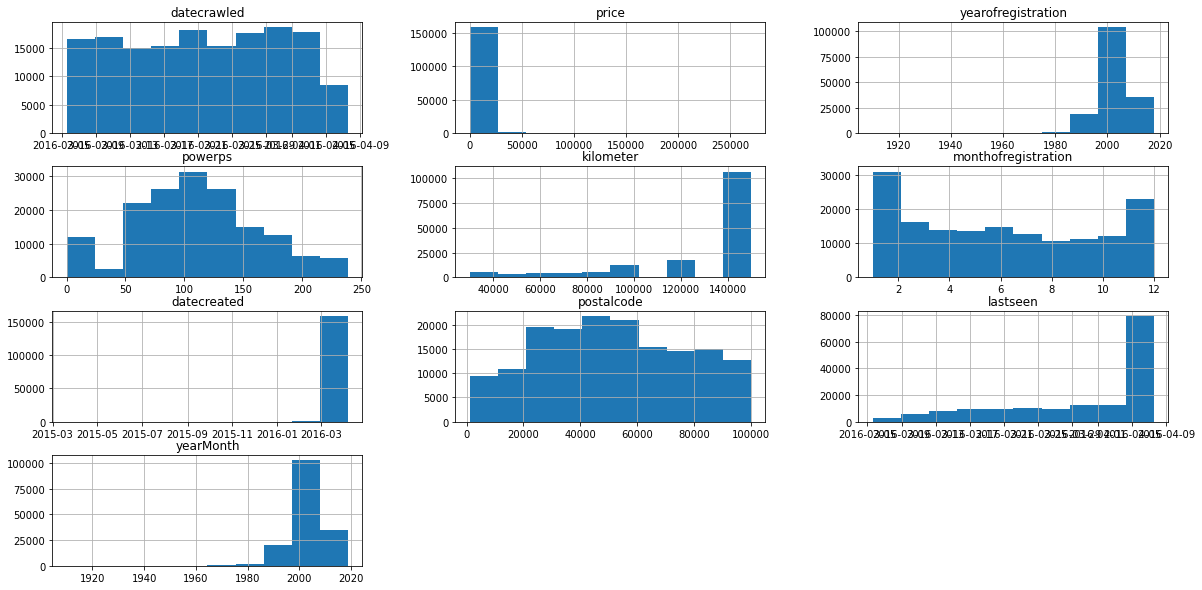

In [92]:
dataset.hist()

In [93]:
dataset.columns

Index(['datecrawled', 'name', 'seller', 'offertype', 'price', 'abtest',
       'vehicletype', 'yearofregistration', 'gearbox', 'powerps', 'model',
       'kilometer', 'monthofregistration', 'fueltype', 'brand',
       'notrepaireddamage', 'datecreated', 'nrofpictures', 'postalcode',
       'lastseen', 'yearMonth', 'daysofregistration'],
      dtype='object')

### Prediction

### Dummies

In [94]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159626 entries, 0 to 159625
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   datecrawled          159626 non-null  datetime64[ns]
 1   name                 159626 non-null  object        
 2   seller               159626 non-null  object        
 3   offertype            159626 non-null  object        
 4   price                159626 non-null  int64         
 5   abtest               159626 non-null  object        
 6   vehicletype          159626 non-null  object        
 7   yearofregistration   159626 non-null  int64         
 8   gearbox              159626 non-null  object        
 9   powerps              159626 non-null  int64         
 10  model                159626 non-null  object        
 11  kilometer            159626 non-null  int64         
 12  monthofregistration  159626 non-null  int64         
 13  fueltype      

In [95]:
dataset.head()

,datecrawled,name,seller,offertype,price,abtest,vehicletype,yearofregistration,gearbox,powerps,...,monthofregistration,fueltype,brand,notrepaireddamage,datecreated,nrofpictures,postalcode,lastseen,yearMonth,daysofregistration
0,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatic,163,...,8,diesel,jeep,no,2016-03-14,False,90480,2016-04-05 12:47:46,2004-08-01,4265
1,2016-03-17 16:54:04,GOLF_4_1_4__3T?ER,privat,Angebot,1500,test,kleinwagen,2001,manual,75,...,6,benzin,volkswagen,no,2016-03-17,False,91074,2016-03-17 17:40:17,2001-06-01,5403
2,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manual,69,...,7,diesel,skoda,no,2016-03-31,False,60437,2016-04-06 10:17:21,2008-07-01,2836
3,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manual,102,...,10,benzin,bmw,yes,2016-04-04,False,33775,2016-04-06 19:17:07,1995-10-01,7493
4,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manual,109,...,8,benzin,peugeot,no,2016-04-01,False,67112,2016-04-05 18:18:39,2004-08-01,4265


In [96]:
dataset.columns

Index(['datecrawled', 'name', 'seller', 'offertype', 'price', 'abtest',
       'vehicletype', 'yearofregistration', 'gearbox', 'powerps', 'model',
       'kilometer', 'monthofregistration', 'fueltype', 'brand',
       'notrepaireddamage', 'datecreated', 'nrofpictures', 'postalcode',
       'lastseen', 'yearMonth', 'daysofregistration'],
      dtype='object')

In [97]:
cols_name=['datecrawled', 'name', 'seller', 'offertype', 'price', 'abtest',
       'vehicletype', 'yearofregistration', 'gearbox', 'powerps', 'model',
       'kilometer', 'monthofregistration', 'fueltype', 'brand',
       'notrepaireddamage', 'datecreated', 'nrofpictures', 'postalcode',
       'lastseen', 'yearMonth', 'daysofregistration']

In [98]:
dummy_seller=pd.get_dummies(dataset['seller'], prefix='Seller')
dummy_offertype=pd.get_dummies(dataset['offertype'], prefix='Offertype')
dummy_abtest=pd.get_dummies(dataset['abtest'], prefix='abtest')
dummy_gearbox=pd.get_dummies(dataset['gearbox'], prefix='gearbox')
dummy_fueltype=pd.get_dummies(dataset['fueltype'], prefix='fueltype')
dummy_model=pd.get_dummies(dataset['model'], prefix='model')
dummy_brand=pd.get_dummies(dataset['brand'], prefix='brand')
dummy_notrepairdamage=pd.get_dummies(dataset['notrepaireddamage'], prefix='notrepaireddamage')

In [99]:
dataset_new=dataset[cols_name].join(dummy_seller)
cols_name=dataset_new.columns.values.tolist()
dataset_new=dataset_new[cols_name].join(dummy_offertype)
cols_name=dataset_new.columns.values.tolist()
dataset_new=dataset_new[cols_name].join(dummy_abtest)
cols_name=dataset_new.columns.values.tolist()
dataset_new=dataset_new[cols_name].join(dummy_gearbox)
cols_name=dataset_new.columns.values.tolist()
dataset_new=dataset_new[cols_name].join(dummy_model)
cols_name=dataset_new.columns.values.tolist()
dataset_new=dataset_new[cols_name].join(dummy_fueltype)
cols_name=dataset_new.columns.values.tolist()
dataset_new=dataset_new[cols_name].join(dummy_brand)
cols_name=dataset_new.columns.values.tolist()
dataset_new=dataset_new[cols_name].join(dummy_notrepairdamage)
cols_name=dataset_new.columns.values.tolist()

In [100]:
dataset_new

,datecrawled,name,seller,offertype,price,abtest,vehicletype,yearofregistration,gearbox,powerps,...,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notrepaireddamage_no,notrepaireddamage_yes
0,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatic,163,...,0,0,0,0,0,0,0,0,1,0
1,2016-03-17 16:54:04,GOLF_4_1_4__3T?ER,privat,Angebot,1500,test,kleinwagen,2001,manual,75,...,0,0,0,0,0,0,1,0,1,0
2,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manual,69,...,1,0,0,0,0,0,0,0,1,0
3,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manual,102,...,0,0,0,0,0,0,0,0,0,1
4,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manual,109,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159621,2016-04-01 20:39:59,Opel_astra_coup,privat,Angebot,1300,test,coupe,1998,manual,75,...,0,0,0,0,0,0,0,0,1,0
159622,2016-04-04 21:57:09,BMW_Sport_Edition_M_Paket_ab_Werk_Leder_Klima_...,privat,Angebot,2599,test,kombi,1998,manual,170,...,0,0,0,0,0,0,0,0,1,0
159623,2016-03-08 10:48:20,VW_Polo_C86_Coup,privat,Angebot,200,test,coupe,1991,manual,45,...,0,0,0,0,0,0,1,0,1,0
159624,2016-03-18 01:57:27,Bmw_330_Diesel_Coup,privat,Angebot,15499,control,coupe,2007,automatic,231,...,0,0,0,0,0,0,0,0,1,0


### Modeling
Now that everything is clean and tidy we can start training our models. The problem at hand is a **classification** problem. We'll be using **Logistic Regression** and a **Support Vector Machine** (*SVC*).
First we'll divide back into **training** and **test** sets, and then create a new **Cross Validation** set to check for **bias** (*overfitting*) or **variance** (*underfitting*).

We'll also use **feature scaling** to improve convergence.

In [102]:
len(dataset_new)*0.8

127700.8

In [112]:
dataset_new.columns.tolist()

['datecrawled',
 'name',
 'seller',
 'offertype',
 'price',
 'abtest',
 'vehicletype',
 'yearofregistration',
 'gearbox',
 'powerps',
 'model',
 'kilometer',
 'monthofregistration',
 'fueltype',
 'brand',
 'notrepaireddamage',
 'datecreated',
 'nrofpictures',
 'postalcode',
 'lastseen',
 'yearMonth',
 'daysofregistration',
 'Seller_gewerblich',
 'Seller_privat',
 'Offertype_Angebot',
 'Offertype_Gesuch',
 'abtest_control',
 'abtest_test',
 'gearbox_automatic',
 'gearbox_manual',
 'model_100',
 'model_145',
 'model_147',
 'model_156',
 'model_159',
 'model_1_reihe',
 'model_1er',
 'model_200',
 'model_2_reihe',
 'model_300c',
 'model_3_reihe',
 'model_3er',
 'model_4_reihe',
 'model_500',
 'model_5_reihe',
 'model_5er',
 'model_601',
 'model_6_reihe',
 'model_6er',
 'model_7er',
 'model_80',
 'model_850',
 'model_90',
 'model_900',
 'model_9000',
 'model_911',
 'model_a1',
 'model_a2',
 'model_a3',
 'model_a4',
 'model_a5',
 'model_a6',
 'model_a8',
 'model_a_klasse',
 'model_accord',
 

In [125]:
dataset_new=pd.DataFrame(dataset_new,columns=[
 'daysofregistration',
 'Seller_gewerblich',
 'Seller_privat',
 'Offertype_Angebot',
 'Offertype_Gesuch',
 'abtest_control',
 'abtest_test',
 'gearbox_automatic',
 'gearbox_manual',
 'model_100',
 'model_145',
 'model_147',
 'model_156',
 'model_159',
 'model_1_reihe',
 'model_1er',
 'model_200',
 'model_2_reihe',
 'model_300c',
 'model_3_reihe',
 'model_3er',
 'model_4_reihe',
 'model_500',
 'model_5_reihe',
 'model_5er',
 'model_601',
 'model_6_reihe',
 'model_6er',
 'model_7er',
 'model_80',
 'model_850',
 'model_90',
 'model_900',
 'model_9000',
 'model_911',
 'model_a1',
 'model_a2',
 'model_a3',
 'model_a4',
 'model_a5',
 'model_a6',
 'model_a8',
 'model_a_klasse',
 'model_accord',
 'model_agila',
 'model_alhambra',
 'model_almera',
 'model_altea',
 'model_amarok',
 'model_andere',
 'model_antara',
 'model_arosa',
 'model_astra',
 'model_auris',
 'model_avensis',
 'model_aveo',
 'model_aygo',
 'model_b_klasse',
 'model_b_max',
 'model_beetle',
 'model_berlingo',
 'model_bora',
 'model_boxster',
 'model_bravo',
 'model_c1',
 'model_c2',
 'model_c3',
 'model_c4',
 'model_c5',
 'model_c_klasse',
 'model_c_max',
 'model_c_reihe',
 'model_caddy',
 'model_calibra',
 'model_captiva',
 'model_carisma',
 'model_carnival',
 'model_cayenne',
 'model_cc',
 'model_ceed',
 'model_charade',
 'model_cherokee',
 'model_citigo',
 'model_civic',
 'model_cl',
 'model_clio',
 'model_clk',
 'model_clubman',
 'model_colt',
 'model_combo',
 'model_cooper',
 'model_cordoba',
 'model_corolla',
 'model_corsa',
 'model_cr_reihe',
 'model_croma',
 'model_crossfire',
 'model_cuore',
 'model_cx_reihe',
 'model_defender',
 'model_delta',
 'model_discovery',
 'model_doblo',
 'model_ducato',
 'model_duster',
 'model_e_klasse',
 'model_elefantino',
 'model_eos',
 'model_escort',
 'model_espace',
 'model_exeo',
 'model_fabia',
 'model_fiesta',
 'model_focus',
 'model_forester',
 'model_forfour',
 'model_fortwo',
 'model_fox',
 'model_freelander',
 'model_fusion',
 'model_g_klasse',
 'model_galant',
 'model_galaxy',
 'model_getz',
 'model_gl',
 'model_glk',
 'model_golf',
 'model_grand',
 'model_i3',
 'model_i_reihe',
 'model_ibiza',
 'model_impreza',
 'model_insignia',
 'model_jazz',
 'model_jetta',
 'model_jimny',
 'model_juke',
 'model_justy',
 'model_ka',
 'model_kadett',
 'model_kaefer',
 'model_kalina',
 'model_kalos',
 'model_kangoo',
 'model_kappa',
 'model_kuga',
 'model_laguna',
 'model_lancer',
 'model_lanos',
 'model_legacy',
 'model_leon',
 'model_lodgy',
 'model_logan',
 'model_lupo',
 'model_lybra',
 'model_m_klasse',
 'model_m_reihe',
 'model_materia',
 'model_matiz',
 'model_megane',
 'model_meriva',
 'model_micra',
 'model_mii',
 'model_modus',
 'model_mondeo',
 'model_move',
 'model_musa',
 'model_mustang',
 'model_mx_reihe',
 'model_navara',
 'model_niva',
 'model_note',
 'model_nubira',
 'model_octavia',
 'model_omega',
 'model_one',
 'model_outlander',
 'model_pajero',
 'model_panda',
 'model_passat',
 'model_phaeton',
 'model_picanto',
 'model_polo',
 'model_primera',
 'model_ptcruiser',
 'model_punto',
 'model_q3',
 'model_q5',
 'model_q7',
 'model_qashqai',
 'model_r19',
 'model_range_rover',
 'model_range_rover_evoque',
 'model_range_rover_sport',
 'model_rangerover',
 'model_rav',
 'model_rio',
 'model_roadster',
 'model_roomster',
 'model_rx_reihe',
 'model_s60',
 'model_s_klasse',
 'model_s_max',
 'model_s_type',
 'model_samara',
 'model_sandero',
 'model_santa',
 'model_scenic',
 'model_scirocco',
 'model_seicento',
 'model_serie_2',
 'model_serie_3',
 'model_sharan',
 'model_signum',
 'model_sirion',
 'model_sl',
 'model_slk',
 'model_sorento',
 'model_spark',
 'model_spider',
 'model_sportage',
 'model_sprinter',
 'model_stilo',
 'model_superb',
 'model_swift',
 'model_terios',
 'model_tigra',
 'model_tiguan',
 'model_toledo',
 'model_touareg',
 'model_touran',
 'model_transit',
 'model_transporter',
 'model_tt',
 'model_tucson',
 'model_twingo',
 'model_up',
 'model_v40',
 'model_v50',
 'model_v60',
 'model_v70',
 'model_v_klasse',
 'model_vectra',
 'model_verso',
 'model_viano',
 'model_vito',
 'model_vivaro',
 'model_voyager',
 'model_wrangler',
 'model_x_reihe',
 'model_x_trail',
 'model_x_type',
 'model_xc_reihe',
 'model_yaris',
 'model_yeti',
 'model_ypsilon',
 'model_z_reihe',
 'model_zafira',
 'fueltype_andere',
 'fueltype_benzin',
 'fueltype_cng',
 'fueltype_diesel',
 'fueltype_elektro',
 'fueltype_hybrid',
 'fueltype_lpg',
 'brand_alfa_romeo',
 'brand_audi',
 'brand_bmw',
 'brand_chevrolet',
 'brand_chrysler',
 'brand_citroen',
 'brand_dacia',
 'brand_daewoo',
 'brand_daihatsu',
 'brand_fiat',
 'brand_ford',
 'brand_honda',
 'brand_hyundai',
 'brand_jaguar',
 'brand_jeep',
 'brand_kia',
 'brand_lada',
 'brand_lancia',
 'brand_land_rover',
 'brand_mazda',
 'brand_mercedes_benz',
 'brand_mini',
 'brand_mitsubishi',
 'brand_nissan',
 'brand_opel',
 'brand_peugeot',
 'brand_porsche',
 'brand_renault',
 'brand_rover',
 'brand_saab',
 'brand_seat',
 'brand_skoda',
 'brand_smart',
 'brand_subaru',
 'brand_suzuki',
 'brand_toyota',
 'brand_trabant',
 'brand_volkswagen',
 'brand_volvo',
 'notrepaireddamage_no',
 'notrepaireddamage_yes'])

In [132]:
train_df = dataset_new[:7000].copy()
train_df["'daysofregistration'"] = train_df["daysofregistration"].copy()
test_df=dataset_new[7000:10000].copy()

In [133]:
train_df.head()

,daysofregistration,Seller_gewerblich,Seller_privat,Offertype_Angebot,Offertype_Gesuch,abtest_control,abtest_test,gearbox_automatic,gearbox_manual,model_100,...,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notrepaireddamage_no,notrepaireddamage_yes,'daysofregistration'
0,4265,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,4265
1,5403,0,1,1,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,5403
2,2836,0,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,2836
3,7493,0,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,7493
4,4265,0,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,4265


In [134]:
test_df.head()

,daysofregistration,Seller_gewerblich,Seller_privat,Offertype_Angebot,Offertype_Gesuch,abtest_control,abtest_test,gearbox_automatic,gearbox_manual,model_100,...,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notrepaireddamage_no,notrepaireddamage_yes
7000,1585,0,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7001,4081,0,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
7002,3650,0,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
7003,5915,0,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7004,1828,0,1,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


#### Cross Validation set

In [135]:
X_Train, X_cv, y_Train, y_cv = train_test_split(train_df, train_df["daysofregistration"], test_size=0.2)
X_Train.drop("daysofregistration", axis=1, inplace=True)
X_cv.drop("daysofregistration", axis=1, inplace=True)

X_test = test_df.copy()

print("Training set observations:", X_Train.shape[0], "  CrossValidation set observations:", X_cv.shape[0])

Training set observations: 5600   CrossValidation set observations: 1400


### Feature Scaling

In [136]:
scaler = StandardScaler() #z = (x-mean)/std

X_Train_scaled = scaler.fit_transform(X_Train) #fit_transform gets mean and std of input
X_cv_scaled = scaler.transform(X_cv) #transform uses mean and std of the training set, so it doesn't interfere with model's bias.
X_test_scaled = scaler.transform(X_test)

C:\Users\gogoa\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- daysofregistration
Feature names seen at fit time, yet now missing:
- 'daysofregistration'

  warnings.warn(message, FutureWarning)


### Logistic Regression

In [137]:
model = LogisticRegression()

model.fit(X_Train_scaled, y_Train)
print("Train Score:", model.score(X_Train_scaled, y_Train))

y_hat_Train = model.predict(X_Train_scaled)

predictions_train = pd.DataFrame({"y":y_Train, "y_hat":y_hat_Train})
predictions_train

C:\Users\gogoa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Score: 0.295


,y,y_hat
3622,4228,4227
1542,6722,7645
3817,6274,7473
1336,2410,2167
4826,949,949
...,...,...
888,9501,9501
1298,6925,6925
5129,3415,3391
1044,5260,4729


In [138]:
print("CV Score:", model.score(X_cv_scaled, y_cv))

y_hat_cv = model.predict(X_cv_scaled)

predictions_cv = pd.DataFrame({"y":y_cv, "y_hat":y_hat_cv})
predictions_cv

CV Score: 0.002142857142857143


,y,y_hat
2186,3050,2701
643,2379,728
316,1954,887
1675,1191,1097
1813,11968,9472
...,...,...
2700,1550,1496
2342,5110,5177
515,17202,6305
5065,5515,6271


### Support Vector Machine (*SVC*)

In [139]:
SV_model = SVC()

SV_model.fit(X_Train_scaled, y_Train)
print("SVC_Train Score:", SV_model.score(X_Train_scaled, y_Train))

SV_y_hat_train = SV_model.predict(X_Train_scaled)

SV_predictions_train = pd.DataFrame({"y":y_Train, "y_hat":SV_y_hat_train})
SV_predictions_train


SVC_Train Score: 0.05785714285714286


,y,y_hat
3622,4228,5119
1542,6722,6305
3817,6274,4145
1336,2410,6305
4826,949,949
...,...,...
888,9501,9501
1298,6925,6305
5129,3415,3748
1044,5260,6305


In [141]:
len(SV_predictions_train)

5600